In [165]:
from bs4 import BeautifulSoup as bs
import requests
import re 
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import string #special operations on string
import spacy #Language models
from matplotlib.pyplot import imread
%matplotlib inline

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [166]:
# storing url in a variable for analysis of amazon dslr camera review
url = "https://www.amazon.in/Canon-1500D-Digital-Camera-S18-55/product-reviews/B07BS4TJ43/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [167]:
# creating empty reviews list
cam_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  cam=[]  

# storing url in a variable for analysis of amazon dslr camera review
url = "https://www.amazon.in/Canon-1500D-Digital-Camera-S18-55/product-reviews/B07BS4TJ43"
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    cam.append(reviews[i].text)  
    cam_reviews=cam_reviews+cam

# writng reviews in a text file 
with open("cam.txt","w",encoding='utf8') as output:
    output.write(str(cam_reviews))

In [168]:
# to check if we are getting a desirable output
cam_reviews

['',
 '',
 '',
 '',
 '',
 '\nNot providing camera bag in my order\n',
 '',
 '',
 '\nNot providing camera bag in my order\n',
 "\nThe photo's turned out very well..I know that if the lens is good, it will come out even better. I am very happy to come in such a low budget\n",
 '',
 '',
 '\nNot providing camera bag in my order\n',
 "\nThe photo's turned out very well..I know that if the lens is good, it will come out even better. I am very happy to come in such a low budget\n",
 '\nnot so good but I brought it knowing all the pros and cons. Image quality is nice. Autofocus doesnt work well in video. the price should be much lower.\n',
 '',
 '',
 '\nNot providing camera bag in my order\n',
 "\nThe photo's turned out very well..I know that if the lens is good, it will come out even better. I am very happy to come in such a low budget\n",
 '\nnot so good but I brought it knowing all the pros and cons. Image quality is nice. Autofocus doesnt work well in video. the price should be much lower.

In [169]:
 # Joinining all the reviews into single paragraph 
cam_string = " ".join(cam_reviews)

In [170]:
cam_string

"     \nNot providing camera bag in my order\n   \nNot providing camera bag in my order\n \nThe photo's turned out very well..I know that if the lens is good, it will come out even better. I am very happy to come in such a low budget\n   \nNot providing camera bag in my order\n \nThe photo's turned out very well..I know that if the lens is good, it will come out even better. I am very happy to come in such a low budget\n \nnot so good but I brought it knowing all the pros and cons. Image quality is nice. Autofocus doesnt work well in video. the price should be much lower.\n   \nNot providing camera bag in my order\n \nThe photo's turned out very well..I know that if the lens is good, it will come out even better. I am very happy to come in such a low budget\n \nnot so good but I brought it knowing all the pros and cons. Image quality is nice. Autofocus doesnt work well in video. the price should be much lower.\n \nLeans quality low\n   \nNot providing camera bag in my order\n \nThe pho

In [171]:
print(type(cam_string))

<class 'str'>


In [172]:
# Removing unwanted symbols incase if exists
cam_string = re.sub("[^A-Za-z" "]+"," ",cam_string).lower()
cam_string = re.sub("[0-9" "]+"," ",cam_string)

In [173]:
#removing punctuations
no_punc_text = cam_string.translate(str.maketrans('','',string.punctuation))
no_punc_text

' not providing camera bag in my order not providing camera bag in my order the photo s turned out very well i know that if the lens is good it will come out even better i am very happy to come in such a low budget not providing camera bag in my order the photo s turned out very well i know that if the lens is good it will come out even better i am very happy to come in such a low budget not so good but i brought it knowing all the pros and cons image quality is nice autofocus doesnt work well in video the price should be much lower not providing camera bag in my order the photo s turned out very well i know that if the lens is good it will come out even better i am very happy to come in such a low budget not so good but i brought it knowing all the pros and cons image quality is nice autofocus doesnt work well in video the price should be much lower leans quality low not providing camera bag in my order the photo s turned out very well i know that if the lens is good it will come out 

In [174]:
#Tokenization
nltk.download("punkt")
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['not', 'providing', 'camera', 'bag', 'in', 'my', 'order', 'not', 'providing', 'camera', 'bag', 'in', 'my', 'order', 'the', 'photo', 's', 'turned', 'out', 'very', 'well', 'i', 'know', 'that', 'if', 'the', 'lens', 'is', 'good', 'it', 'will', 'come', 'out', 'even', 'better', 'i', 'am', 'very', 'happy', 'to', 'come', 'in', 'such', 'a', 'low', 'budget', 'not', 'providing', 'camera', 'bag']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [175]:
len(text_tokens)

1698

In [176]:
#removing stopwords
stop_words = stopwords.words("english")
for i in stop_words:
  print(i,end = ",")
  # if i not in stop_words:
  #   pass
  # else:

i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't,

In [177]:
len(stop_words)

179

In [178]:
#removing stopwords by for loop
no_stop_token = []
for word in text_tokens:
    if word != stop_words:
        no_stop_token.append(word)
no_stop_token

['not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'the',
 'photo',
 's',
 'turned',
 'out',
 'very',
 'well',
 'i',
 'know',
 'that',
 'if',
 'the',
 'lens',
 'is',
 'good',
 'it',
 'will',
 'come',
 'out',
 'even',
 'better',
 'i',
 'am',
 'very',
 'happy',
 'to',
 'come',
 'in',
 'such',
 'a',
 'low',
 'budget',
 'not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'the',
 'photo',
 's',
 'turned',
 'out',
 'very',
 'well',
 'i',
 'know',
 'that',
 'if',
 'the',
 'lens',
 'is',
 'good',
 'it',
 'will',
 'come',
 'out',
 'even',
 'better',
 'i',
 'am',
 'very',
 'happy',
 'to',
 'come',
 'in',
 'such',
 'a',
 'low',
 'budget',
 'not',
 'so',
 'good',
 'but',
 'i',
 'brought',
 'it',
 'knowing',
 'all',
 'the',
 'pros',
 'and',
 'cons',
 'image',
 'quality',
 'is',
 'nice',
 'autofocus',
 'doesnt',
 'work',
 'well',
 'in',
 'video',
 'the',
 'price',
 'should',
 'be',
 'much',
 'lower',
 'not',

In [179]:
#Converting all into lower case
lower_words = []
for i in no_stop_token:
  lower_words.append(i.lower())
lower_words

['not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'the',
 'photo',
 's',
 'turned',
 'out',
 'very',
 'well',
 'i',
 'know',
 'that',
 'if',
 'the',
 'lens',
 'is',
 'good',
 'it',
 'will',
 'come',
 'out',
 'even',
 'better',
 'i',
 'am',
 'very',
 'happy',
 'to',
 'come',
 'in',
 'such',
 'a',
 'low',
 'budget',
 'not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'the',
 'photo',
 's',
 'turned',
 'out',
 'very',
 'well',
 'i',
 'know',
 'that',
 'if',
 'the',
 'lens',
 'is',
 'good',
 'it',
 'will',
 'come',
 'out',
 'even',
 'better',
 'i',
 'am',
 'very',
 'happy',
 'to',
 'come',
 'in',
 'such',
 'a',
 'low',
 'budget',
 'not',
 'so',
 'good',
 'but',
 'i',
 'brought',
 'it',
 'knowing',
 'all',
 'the',
 'pros',
 'and',
 'cons',
 'image',
 'quality',
 'is',
 'nice',
 'autofocus',
 'doesnt',
 'work',
 'well',
 'in',
 'video',
 'the',
 'price',
 'should',
 'be',
 'much',
 'lower',
 'not',

In [180]:
#normalizing the data
lower_words = [x.lower() for x in no_stop_token]
print(lower_words[0:25])

['not', 'providing', 'camera', 'bag', 'in', 'my', 'order', 'not', 'providing', 'camera', 'bag', 'in', 'my', 'order', 'the', 'photo', 's', 'turned', 'out', 'very', 'well', 'i', 'know', 'that', 'if']


In [181]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
stemmed_tokens[0:25]

['not',
 'provid',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'not',
 'provid',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'the',
 'photo',
 's',
 'turn',
 'out',
 'veri',
 'well',
 'i',
 'know',
 'that',
 'if']

In [182]:
#Lemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [183]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in lower_words]
lemmatized_tokens[0:25]

['not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'not',
 'providing',
 'camera',
 'bag',
 'in',
 'my',
 'order',
 'the',
 'photo',
 's',
 'turned',
 'out',
 'very',
 'well',
 'i',
 'know',
 'that',
 'if']

In [184]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 100)
X = vectorizer.fit_transform(lemmatized_tokens)

In [185]:
#creating a dataframe
import pandas as pd
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending = False).head(20)

,0
you,99
work,98
with,97
will,96
well,95
wa,94
video,93
very,92
upload,91
turned,90


In [186]:
print(X.toarray().shape)

(1698, 100)


In [187]:
#Bigrams and Trigrams
vectorizer_ngram_range = CountVectorizer(analyzer = "word",ngram_range=(1,3),max_features = 100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(lemmatized_tokens)

In [188]:
vectorizer_ngram_range.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['all',
 'also',
 'am',
 'amazon',
 'and',
 'aperature',
 'are',
 'auto',
 'autofocus',
 'bag',
 'battery',
 'be',
 'best',
 'better',
 'brought',
 'budget',
 'but',
 'camera',
 'canon',
 'card',
 'come',
 'compensate',
 'con',
 'didn',
 'doesnt',
 'dslr',
 'enough',
 'etc',
 'even',
 'focus',
 'for',
 'get',
 'go',
 'good',
 'got',
 'great',
 'happy',
 'have',
 'if',
 'image',
 'in',
 'is',
 'it',
 'know',
 'knowing',
 'landscape',
 'lean',
 'lens',
 'like',
 'look',
 'loved',
 'low',
 'lower',
 'me',
 'memory',
 'mm',
 'mode',
 'much',
 'my',
 'need',
 'nice',
 'not',
 'object',
 'of',
 'on',
 'order',
 'out',
 'phone',
 'photo',
 'pic',
 'picture',
 'point',
 'price',
 'pro',
 'product',
 'providing',
 'quality',
 'really',
 'replacement',
 'screen',
 'shopping',
 'should',
 'so',
 'such',
 'taking',
 'that',
 'the',
 'they',
 'this',
 'to',
 'turned',
 'upload',
 'very',
 'video',
 'wa',
 'well',
 'will',
 'with',
 'work',
 'you']

In [189]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [190]:
#TFID Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm = "l2",analyzer = "word",ngram_range = (1,3),max_features= 100)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(lemmatized_tokens)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['all', 'also', 'am', 'amazon', 'and', 'aperature', 'are', 'auto', 'autofocus', 'bag', 'battery', 'be', 'best', 'better', 'brought', 'budget', 'but', 'camera', 'canon', 'card', 'come', 'compensate', 'con', 'didn', 'doesnt', 'dslr', 'enough', 'etc', 'even', 'focus', 'for', 'get', 'go', 'good', 'got', 'great', 'happy', 'have', 'if', 'image', 'in', 'is', 'it', 'know', 'knowing', 'landscape', 'lean', 'lens', 'like', 'look', 'loved', 'low', 'lower', 'me', 'memory', 'mm', 'mode', 'much', 'my', 'need', 'nice', 'not', 'object', 'of', 'on', 'order', 'out', 'phone', 'photo', 'pic', 'picture', 'point', 'price', 'pro', 'product', 'providing', 'quality', 'really', 'replacement', 'screen', 'shopping', 'should', 'so', 'such', 'taking', 'that', 'the', 'they', 'this', 'to', 'turned', 'upload', 'very', 'video', 'wa', 'well', 'will', 'with', 'work', 'you']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0.

In [191]:
#Wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

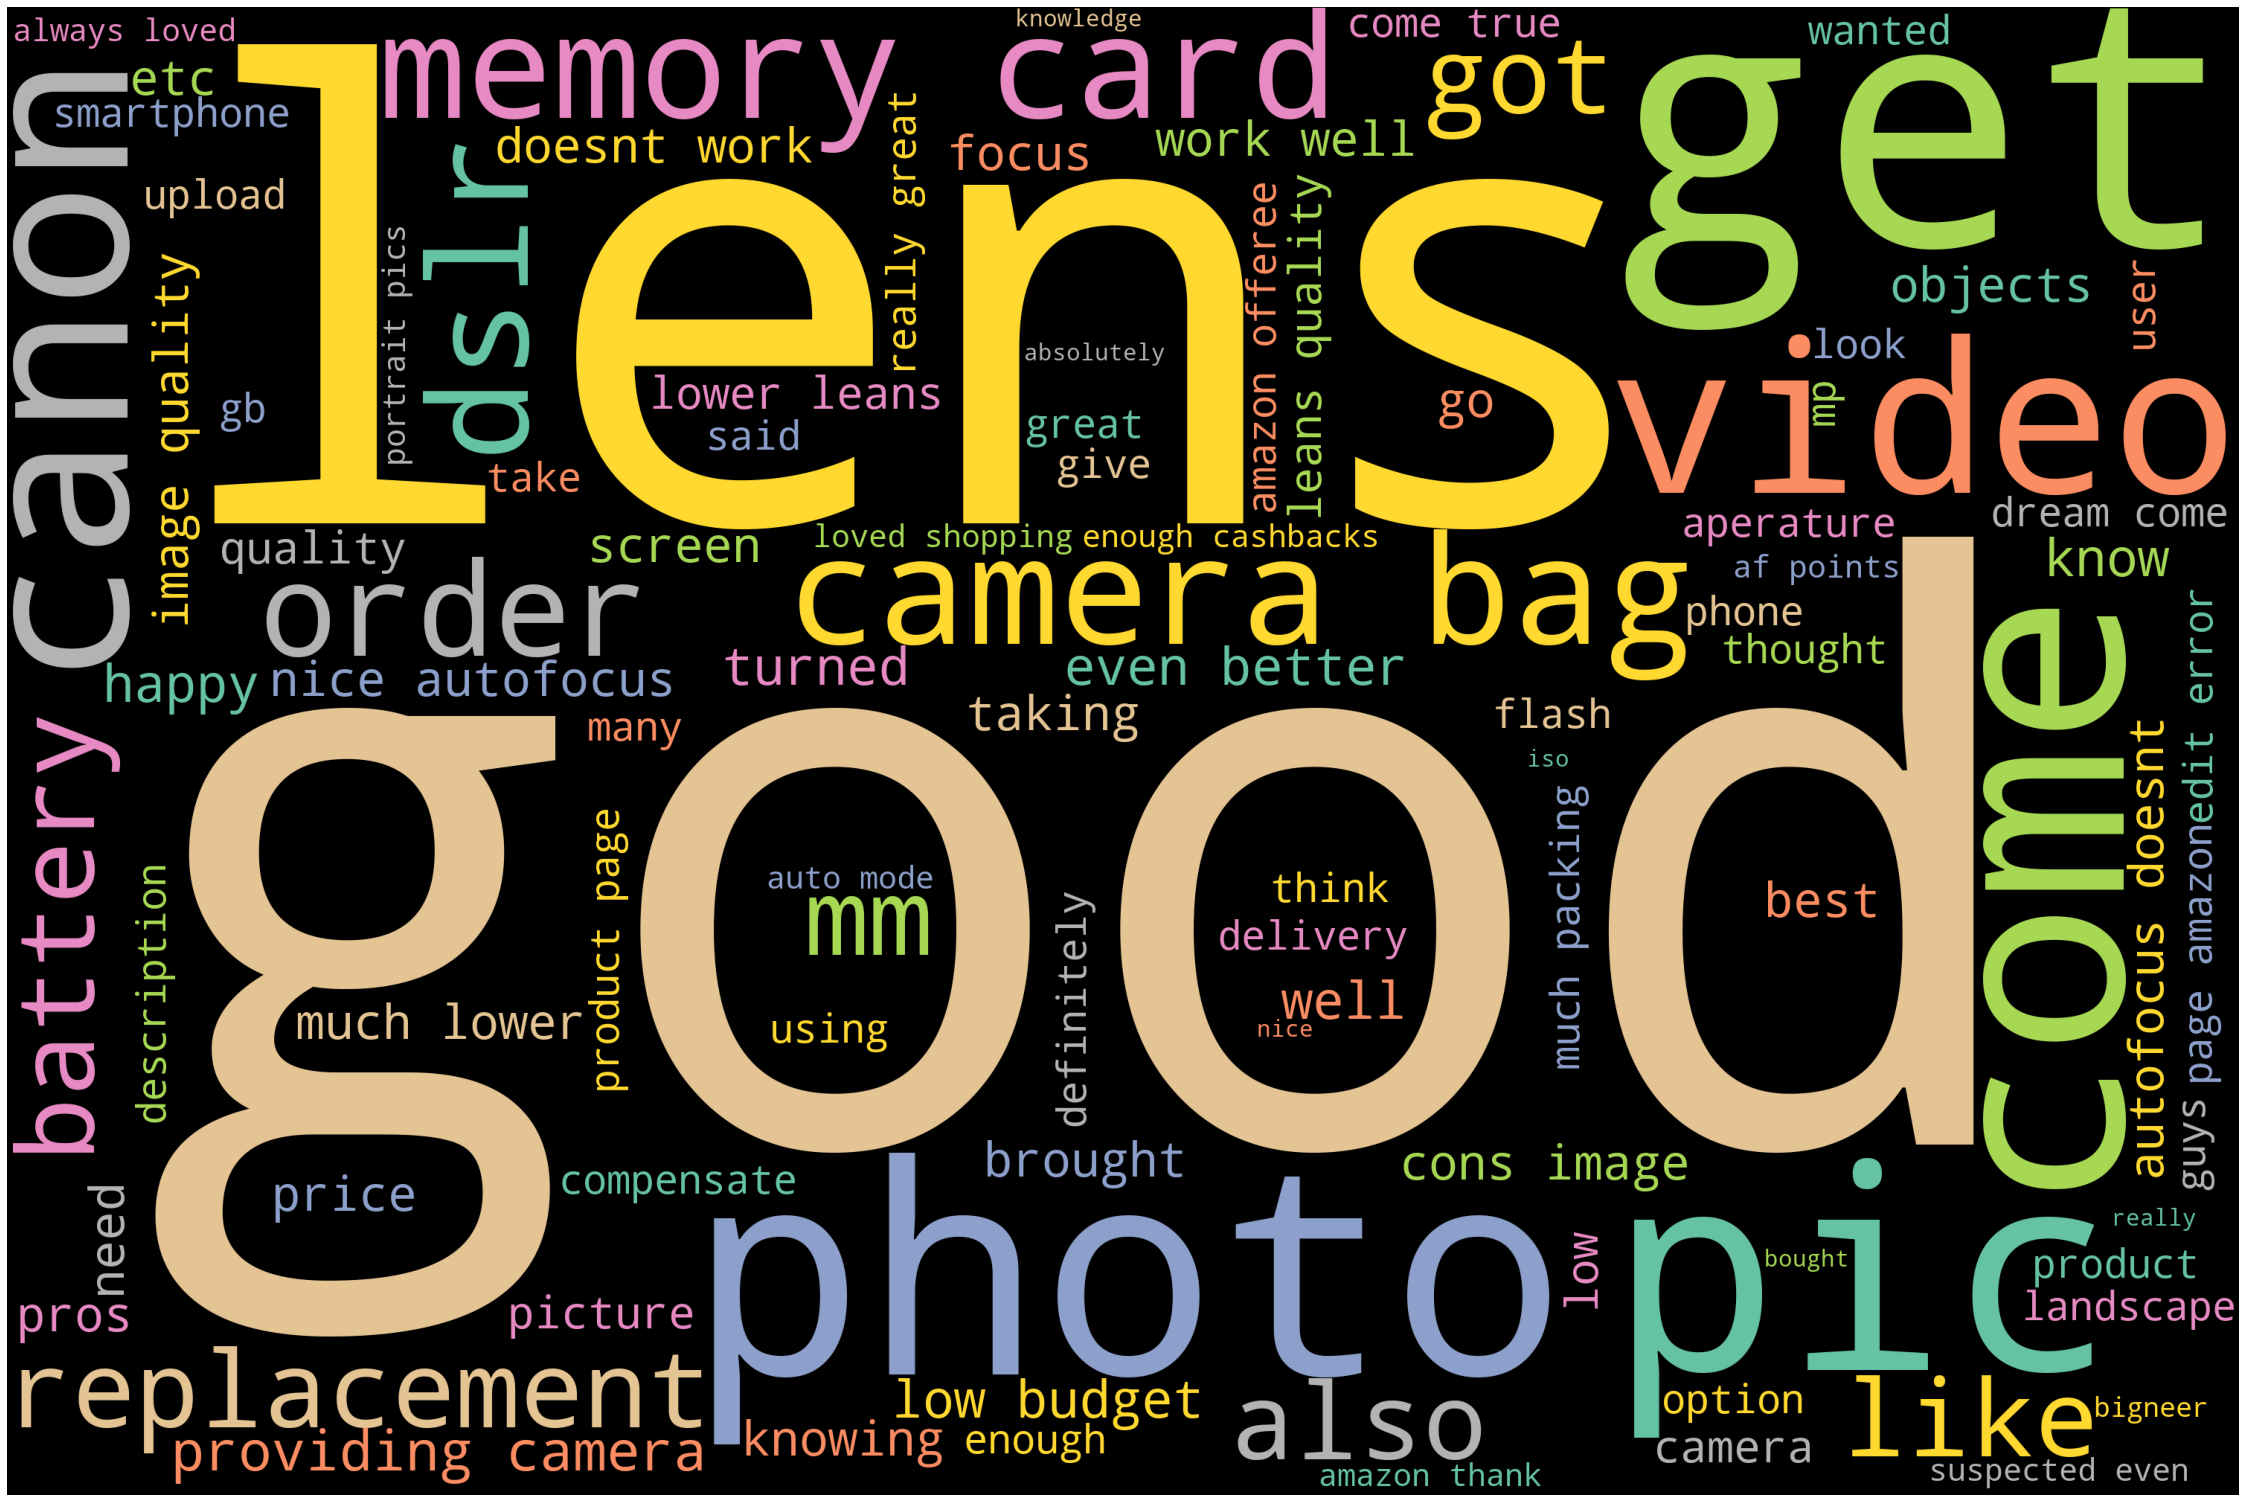

In [192]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color = "black",max_words = 100, colormap = "Set2",stopwords = stop_words).generate(cam_string)
#plot
plot_cloud(wordcloud) 

In [193]:
#performing emotion mining for reviews stored in cam.txt file

In [194]:
import spacy
from textblob import TextBlob

In [195]:
print(type(cam))

<class 'list'>


In [196]:
new_df = pd.DataFrame(cam,columns = ["reviews"])
new_df

,reviews
0,
1,
2,\nNot providing camera bag in my order\n
3,\nThe photo's turned out very well..I know tha...
4,\nnot so good but I brought it knowing all the...
5,\nLeans quality low\n
6,\nIts a dream come true for me. Loved the prod...
7,\nFor bigneer it's a good camera\n
8,\nI bought this camera with absolutely no know...
9,\nVery nice picture quality & very nice featur...


In [197]:
df_string = new_df.to_string()
df_string

"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [198]:
blob = TextBlob(df_string)
print(blob.sentiment)

Sentiment(polarity=0.36604679802955664, subjectivity=0.5605870279146141)


In [199]:
#sentiment of one of the comment from df_string
text = "he photo's turned out very well..I know that if the lens is good, it will come out even better. I am very happy to come in such a low budget"
blob_ = TextBlob(text)
blob_.sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.5333333333333333)

In [200]:
text2 = "very nice features"
blob_2 = TextBlob(text2)
blob_2.sentiment

Sentiment(polarity=0.78, subjectivity=1.0)

In [201]:
# Assingment problem statement for stop.txt,positive.txt and negative.txt

In [202]:
#stop.txt
with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

text_tokens = [w for w in text_tokens if not w in stopwords]

In [203]:
# Joinining all the reviews into single paragraph 
text_token_para = " ".join(text_tokens)

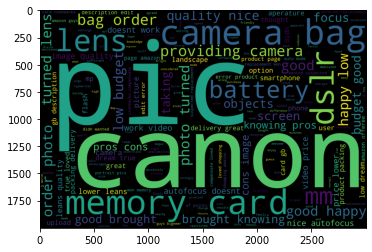

In [204]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(text_token_para)

plt.imshow(wordcloud_ip)

In [205]:
#positive.txt
with open("positive-words.txt","r") as pw:
  posiwords = pw.read().split("\n")

In [206]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([i for i in text_tokens if i in posiwords])

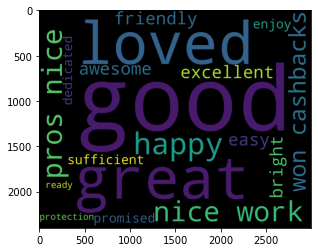

In [207]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [208]:
#negative.txt
with open("negative-words1.txt","r") as neg:
  negwords = neg.read().split("\n")

In [209]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([i for i in text_tokens if i in negwords])

In [ ]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)